# US Accidents Exploratory Data Analysis
1. Datasets gotten from Kaggle
2. It contains information about US accidents
3. Analysis can be use to prevent accidents

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#pip install opendatasets --upgrade --quiet

In [3]:
#import opendatasets as od
#download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
#od.download(download_url)

#input your kaggle username and get your apikey from your kaggle acct

## Data Preparation and Cleaning

In [5]:
data = pd.read_csv('US_Accidents_Dec20_updated.csv')
data.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   
3  A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10148   
4  A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45   41.06213   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   
3  -84.52341  39.09841 -84.52241         0.219   
4  -81.53784  41.06217 -81.53547         0.123   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
4                    At Dart Ave/Exit 21 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night             Night                   Day  
4          Night               Day                   Day  

[5 rows x 47 columns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [13]:
data.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06   
mean   2.238630e+00  3.690056e+01 -9.859919e+01  3.690061e+01 -9.859901e+01   
std    6.081481e-01  5.165653e+00  1.849602e+01  5.165629e+00  1.849590e+01   
min    1.000000e+00  2.457022e+01 -1.244976e+02  2.457011e+01 -1.244978e+02   
25%    2.000000e+00  3.385422e+01 -1.182076e+02  3.385420e+01 -1.182077e+02   
50%    2.000000e+00  3.735113e+01 -9.438100e+01  3.735134e+01 -9.437987e+01   
75%    2.000000e+00  4.072593e+01 -8.087469e+01  4.072593e+01 -8.087449e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  1.516064e+06  4.699690e+05    1.473031e+06   1.066748e+06   
mean   5.872617e-01  8.907533e+03    5.958460e+01   5.510976e+01   
std    1.632659e+00  2.242190e+04    1.827316e+01   2.112735e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    0.000000e+00  1.212000e+03    4.700000e+01   4.080000e+01   
50%    1.780000e-01  4.000000e+03    6.100000e+01   5.700000e+01   
75%    5.940000e-01  1.010000e+04    7.300000e+01   7.100000e+01   
max    1.551860e+02  9.999997e+06    1.706000e+02   1.130000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  1.470555e+06  1.479790e+06    1.471853e+06     1.387202e+06   
mean   6.465960e+01  2.955495e+01    9.131755e+00     7.630812e+00   
std    2.325986e+01  1.016756e+00    2.889112e+00     5.637364e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.944000e+01    1.000000e+01     4.600000e+00   
50%    6.800000e+01  2.988000e+01    1.000000e+01     7.000000e+00   
75%    8.400000e+01  3.004000e+01    1.000000e+01     1.040000e+01   
max    1.000000e+02  5.804000e+01    1.400000e+02     9.840000e+02   

       Precipitation(in)  
count       1.005515e+06  
mean        8.477855e-03  
std         1.293168e-01  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = data.select_dtypes(include=numerics)
len(numeric.columns)

14

In [21]:
# Checking for missing values
missing_percentage =data.isna().sum().sort_values(ascending=False) / len(data)
missing_percentage

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
Country                  0.000000
Give_Way                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
Station                  0.000000
Roundabout    

In [23]:
# We removing values that doesn't have a missing value
missing_percentages = missing_percentage[missing_percentage != 0]
missing_percentages

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
dtype: float64

<AxesSubplot:>

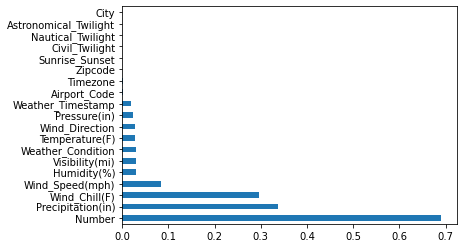

In [24]:
missing_percentages.plot(kind='barh')

## Explortory Analysis and Visualization
Columns we'll analyze:
* City
* Start Time
* Start lat, start lng
* Temperature
* Weather Conditions

In [26]:
data.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [28]:
cities = data.City.unique()
len(cities)

10658

In [30]:
cities_by_accident = data.City.value_counts()
cities_by_accident

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Fitzhugh           1
Altona             1
Bacliff            1
Ozona              1
Shullsburg         1
Name: City, Length: 10657, dtype: int64

In [31]:
cities_by_accident[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

In [37]:
# Checking if New york exist in city
'Chicago' in data.City

False

## Ask & answer questions
1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capital?
3. Does New York show up in the data? If yes, why is the count lower if this the most populated city